<a href="https://colab.research.google.com/github/Romneasek/KNN_NB_Project/blob/main/KNN_NB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
data = pd.read_csv('/content/ortho_knnnb.csv')

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
# Shape of dataset
data.shape

(310, 7)

In [5]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [6]:
# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
# getting discriptive statistcs (Summary of the data)
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [9]:
# Data type
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

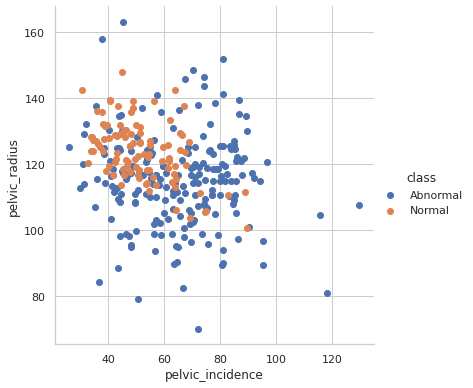

In [11]:
# 2-D Scatter plot.
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=5.5) \
   .map(plt.scatter, "pelvic_incidence", "pelvic_radius") \
   .add_legend();
plt.show();


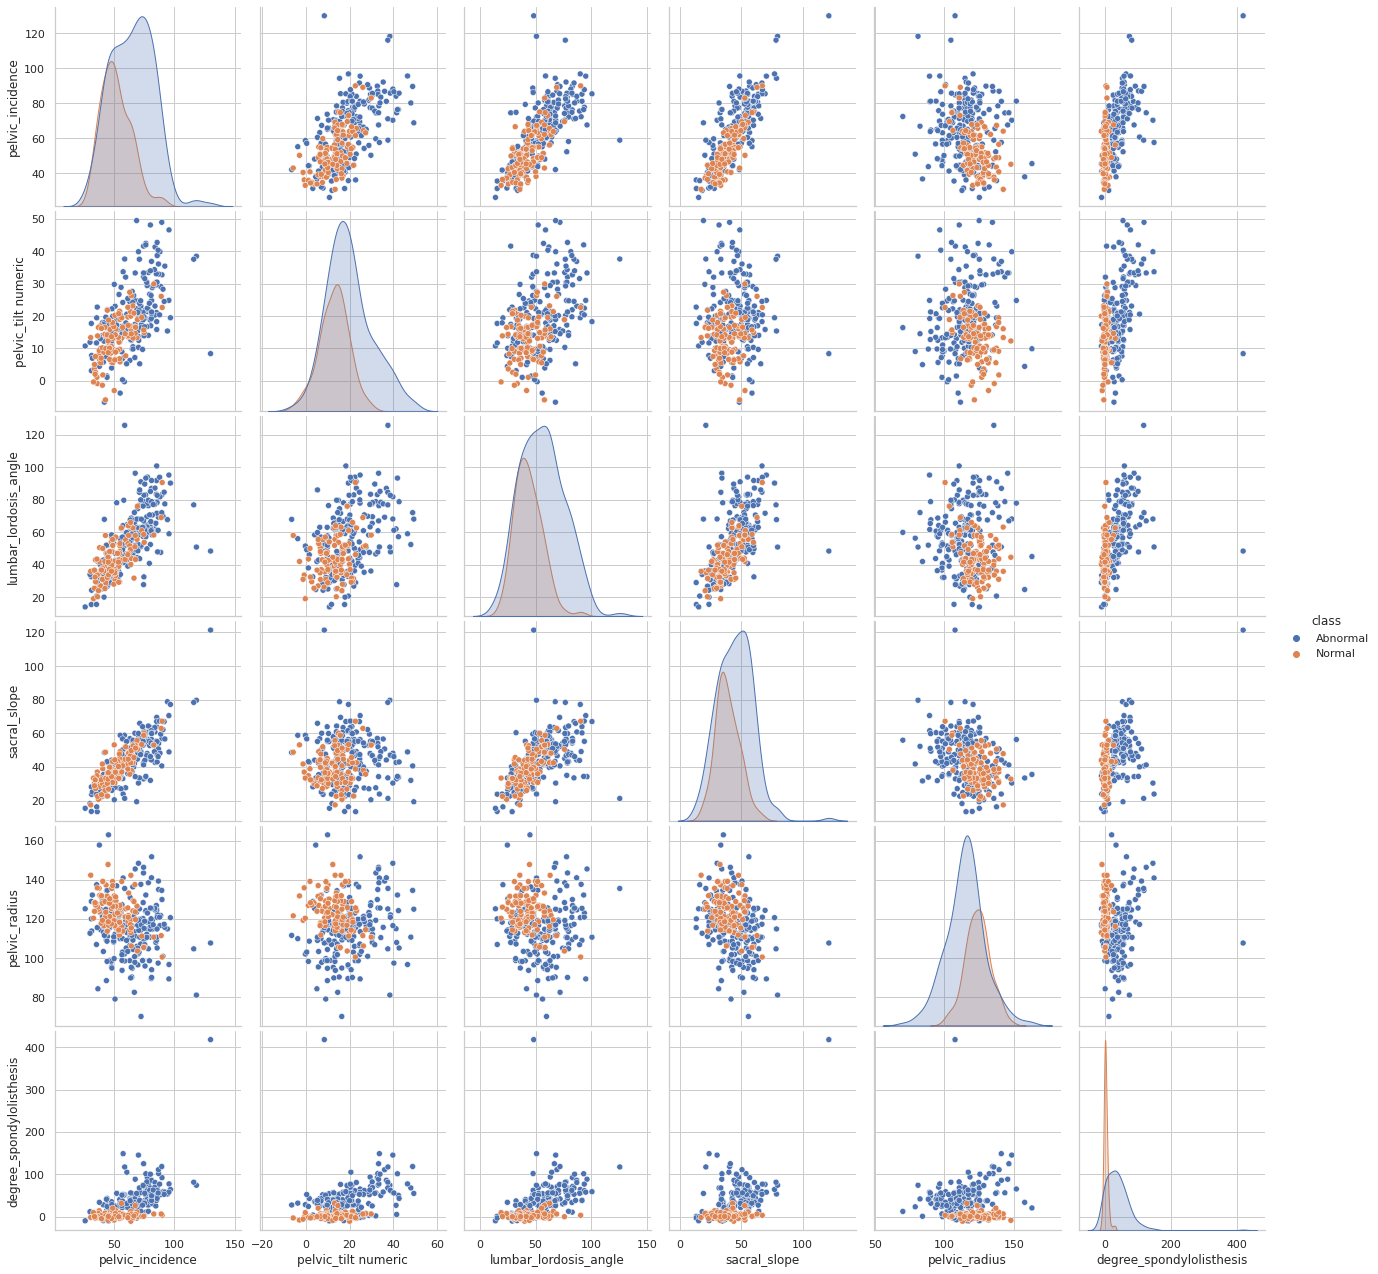

In [12]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="class", size=3);
plt.show()

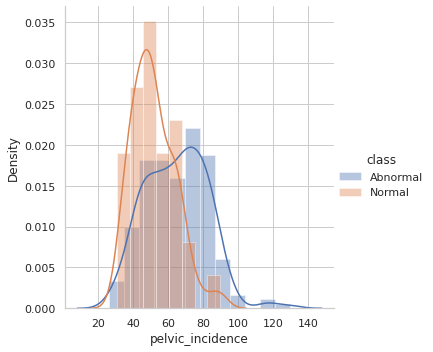

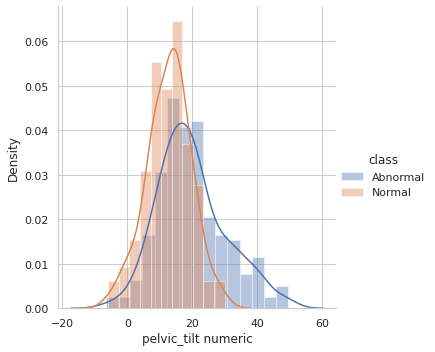

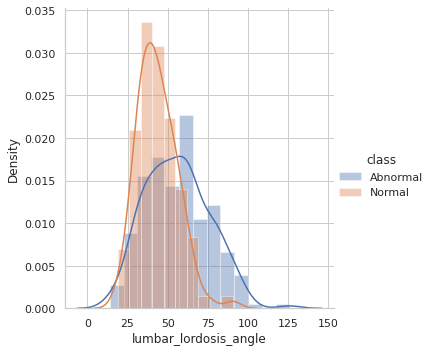

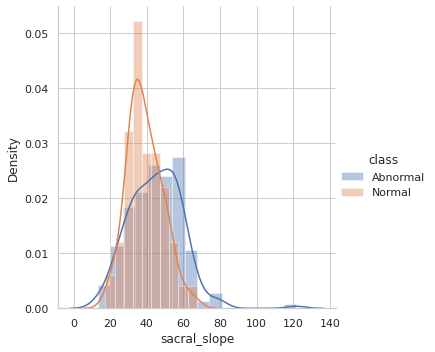

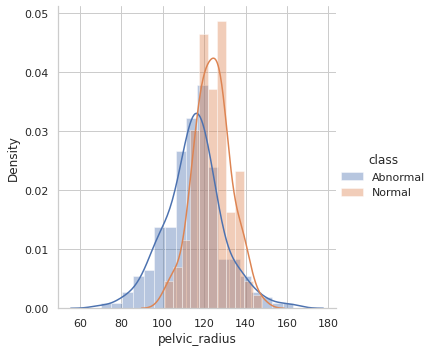

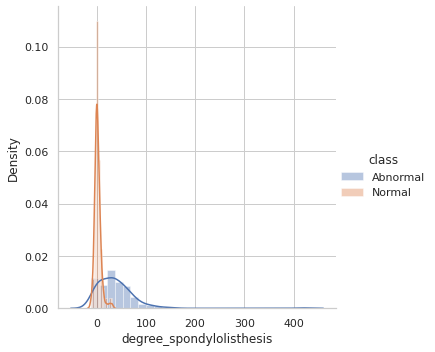

In [13]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="class", size=5).map(sns.distplot, name).add_legend()
plt.show()

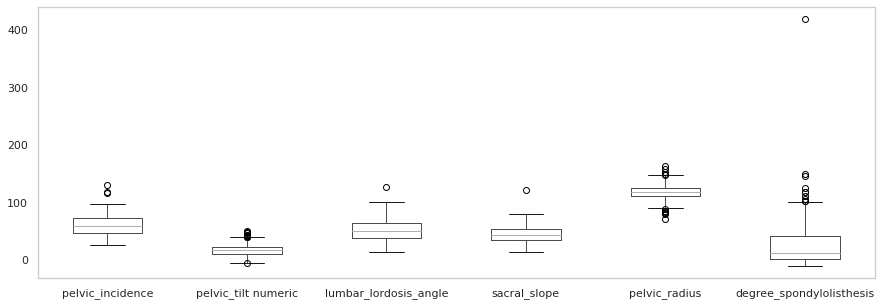

In [17]:
data.boxplot(column= ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],figsize=(15,5),grid = False)

In [18]:
# Extracting dataframe for only 'Object' datatypes
data_ct = data.select_dtypes(include='object')
data_ct.head()

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


In [19]:
# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [22]:
#data points for each class
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Text(0.5, 1.0, 'class distribution')

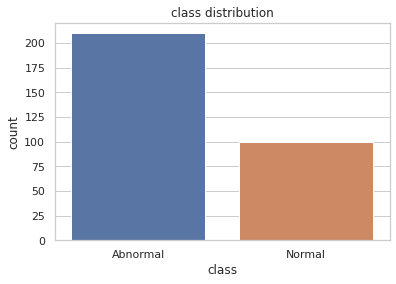

In [23]:
#Count plot for Species
sns.countplot('class',data = data)
plt.title("class distribution")

In [24]:
# Import label encoder 
from sklearn import preprocessing 
  
# # label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
data['class']= label_encoder.fit_transform(data['class']) 

In [25]:
#Check unique value of species
data['class'].unique()

array([0, 1])

In [26]:
# Showing overview of the dataset
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [27]:
#Constructing correlation Matrix
corr = data.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


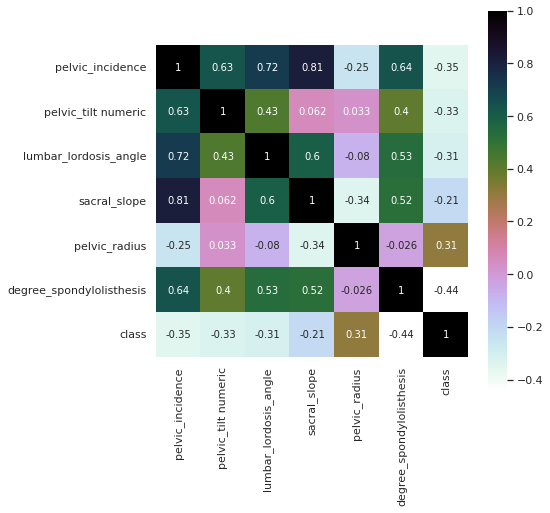

In [28]:
#heatmap 
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [29]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20,random_state = 1)

In [30]:
#considering only highly correlated features for training and validation
train_x = train.drop(['class'], axis = 1)
train_y = train['class']             

test_x = test.drop(['class'],axis = 1)
test_y = test['class'] 

In [31]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)


In [59]:
# Using KNN Classifier for model building 

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [60]:
# Predict class for test data
pred = KNN.predict(test_x)
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [61]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=3 is 83.87%


In [ ]:
# By choosing K=3, we found the Accuracy value as 83.87%. 
# However, there may be a K hyperparameter value that will make the Accuracy value higher. 
# Let's find this now.

In [68]:
train_accuracy = []
test_accuracy = []
for k in range(1,30):                               
    KNN = KNeighborsClassifier(n_neighbors=k)         
    KNN.fit(train_x, train_y)

    train_accuracy.append(KNN.score(train_x, train_y))
    test_accuracy.append(KNN.score(test_x, test_y))

print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

Best accuracy is 0.8548387096774194 with K = 1


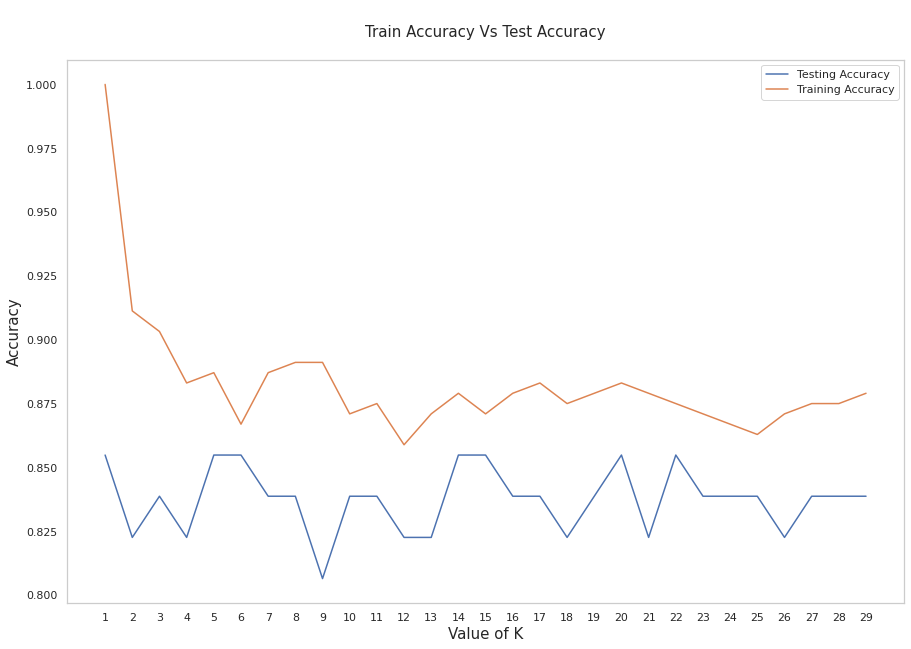

In [69]:
#Accuracy Plot
plt.figure(figsize=[15,10])
plt.plot(range(1,30), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,30), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=15)
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(range(1,30))
plt.grid()
plt.show()

In [74]:
# Tuning Parameters using Grid search cross validation 
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,30,1))}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [75]:
# KNN best estimator
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(n_neighbors=18)

In [76]:
# Print hyperparameter
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'n_neighbors': 18}
Best score: 0.8626938775510204


In [77]:
# Using best hyperparameter

knn = knn_besthypr.fit(train_x,train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 18 is 82.26%


In [80]:
# According to the result of the test, the K value with the highest accuracy value is 1 (85.48%).

In [79]:
# lets see the actual and predicted value 
test["pred_class"] = pred
test

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,pred_class
78,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0,0
244,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,1,1
185,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0
70,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0,0
120,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,0,0
...,...,...,...,...,...,...,...,...
146,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122,0,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0,0
127,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,0,0
16,63.834982,20.362507,54.552434,43.472475,112.309491,-0.622527,0,1


In [ ]:
##############
##############
##############

In [81]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB()

In [82]:
# Predicting the Test set results
y_pred = nvclassifier.predict(test_x)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0]


In [85]:
# Lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_class"] = y_pred
test

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,pred_class
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0,0
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,1,0
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0,0
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,0,0
...,...,...,...,...,...,...,...,...
57,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122,0,0
58,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0,0
59,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,0,0
60,63.834982,20.362507,54.552434,43.472475,112.309491,-0.622527,0,1


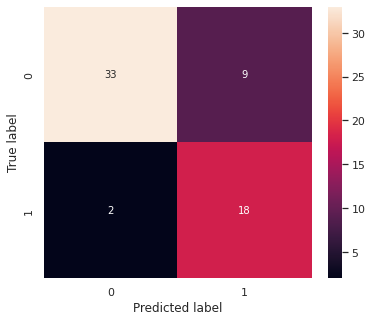

In [86]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [88]:
# Finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]

print('Correct predictions: ', corrPred)
print('False predictions', falsePred)

acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))


Correct predictions:  51
False predictions 11
Accuracy of the Naive Bayes Clasification is 82.26% 


In [89]:
# Finding accuracy from Sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred = y_pred, y_true = test_y)
print(accuracy)
print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,test_y)*100,2)))

0.8225806451612904
The accuracy of the NB is 82.26%


In [90]:
# Predicted_probabilities
nvclassifier.predict_proba(test_x)[:10]

array([[9.99976946e-01, 2.30544189e-05],
       [5.43618382e-01, 4.56381618e-01],
       [1.00000000e+00, 5.88570384e-17],
       [9.99920953e-01, 7.90472863e-05],
       [9.99996058e-01, 3.94244355e-06],
       [9.99720050e-01, 2.79949544e-04],
       [7.41812234e-03, 9.92581878e-01],
       [1.00000000e+00, 6.69383180e-17],
       [1.00000000e+00, 1.21419008e-26],
       [9.74310233e-01, 2.56897665e-02]])